# Beam pattern of ULA
First, we define a right-handed coordinate system as follows:
the x-axis points to the right, the y-axis points upward, and the positive direction of the azimuth angle is counterclockwise around the z-axis.
Next, we consider a uniform linear array (ULA) with $N$ elements placed along the x-axis, with a uniform inter-element spacing of $d$.
The element numbers increase in the positive x-axis direction.
Here, $d$ is given as a fraction of the wavelength; for example, $d = 0.5$.

<img src="../images/01_coordinate_system_of_ULA.svg" width="600" style="background-color: white;">

Assume a planar wave arrives at this ULA from a direction $R$, a phase difference occurs at each element.
These phase differences can be expressed as $2j\pi kd\sin\theta$, using the optical path difference $kd\sin\theta$.
If the incident signal is a complex sinusoid $x$, the received signal $y_k$ at each element will also be a complex sinusoid.
$$
y_k = e^{2j\pi kd\sin\theta}x, (k=0,\dots,N-1)
$$
The incident and received signals can be described as \boldsymbol{y}=\boldsymbol{s}x using the steering vector, where
$$
\boldsymbol{y}=
\begin{bmatrix}
y_0\\
y_1\\
\vdots\\
y_{N-1}\\
\end{bmatrix},
\boldsymbol{s}=
\begin{bmatrix}
1\\
e^{2j\pi d\sin\theta}\\
\vdots\\
e^{2j\pi (N-1)d\sin\theta}\\
\end{bmatrix}.
$$
The beam pattern of this ULA can be observed by implementing it as shown below.
The `ULA` class is implemented in Python within the `4DRadar-Simulation` project.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sensor import ULA

In [ ]:
theta_0 = 0
nr = 7
d = 0.5

ula_normal = ULA(nr, d)
coef = ula_normal.get_steering_vector(theta_0)
p_fft, angle_bins_fft = ula_normal.get_beam_pattern_fft(coef) # FFT solution
p, angle_bins = ula_normal.get_beam_pattern(theta_0) # analytical solution

The above implementation defines a ULA with 7 elements and evaluates the beam pattern using a steering vector for an angle of $\theta_0 = 0$.
The case of $\theta_0 = 0$ is known as *boresight* and is commonly used for evaluating some array.
Besides the FFT-based solution, it is well known that the beam pattern can also be computed analytically.
The function `get_beam_pattern_fft` implements the former, while `get_beam_pattern` uses the analytical solution.
The analytical solution $p(\theta)$ is given as follows.
$$
p(\theta)=\frac
{\sin\left[N\pi d\left( \sin\theta - \sin\theta_0\right)\right]}
{N\sin\left[\pi d\left( \sin\theta - \sin\theta_0\right)\right]}
$$
It can be seen that the beam patterns computed using FFT and analytical solutions are identical.

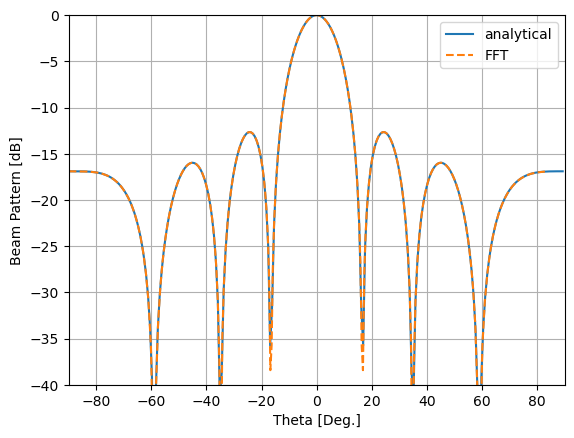

In [ ]:
angle_bins_deg = np.rad2deg(angle_bins)
angle_bins_fft_deg = np.rad2deg(angle_bins_fft)

fig, ax = plt.subplots()
ax.set_ylabel('Beam Pattern [dB]')
ax.set_xlabel('Theta [Deg.]')
ax.set_xlim([-90, 90])
ax.set_ylim([-40, 0])
ax.plot(angle_bins_deg, p, '-', label='analytical')
ax.plot(angle_bins_fft_deg, p_fft, '--', label='FFT')
ax.grid()
ax.legend()

The region in the beam pattern where the array is most sensitive and receives the strongest signal is called *main lobe*,
aside from the main lobe, where the array can still receive signals, but with much lower sensitivity are called *side lobes*.
While direction in the beam pattern where the array sensitivity drops to zero or its minimum value is called *null*.

For evaluating array directivity and resolution HPBW and FNBW are commonly used.
HPBW (Half Power Beamwidth) is the angular width of the main lobe of an antenna pattern between the points where the radiated power falls to half (or -6 dB) of its maximum value.
The smaller the HPBW, the more focused the beam.
FNBW (First Null Beamwidth) is the angle between the first nulls (points where the radiation pattern drops to zero) on either side of the main lobe.
It indicates the angular width between the first two directions where the antenna does not receive any signals.
FNBW is important for understanding the spacing of side lobes and the ability to resolve multiple targets.

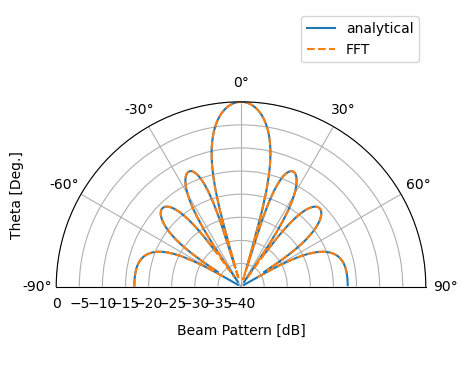

In [ ]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.set_thetalim([-np.pi/2, np.pi/2])
ax.set_rlim([-40, 0])
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_xlabel('Beam Pattern [dB]', labelpad=-40)
ax.set_ylabel('Theta [Deg.]', labelpad=20)
ax.plot(angle_bins, p, '-', label='analytical')
ax.plot(angle_bins_fft, p_fft, '--', label='FFT')
ax.legend()

The beam pattern is often plotted in polar coordinates to show the directivity of array.
By plotting the pattern in polar form, it becomes intuitive to understand how the array responds to signals arriving from different directions.

Next, for evaluating when the spacing between array elements is greater than half the wavelength i.e. $d > 0.5$. 

In [ ]:
theta_0 = 0
p, angle_bins = ula_normal.get_beam_pattern(theta_0)

d_grating = 0.8
ula_grating = ULA(nr, d_grating)
p_grating, angle_bins_grating = ula_grating.get_beam_pattern(theta_0)

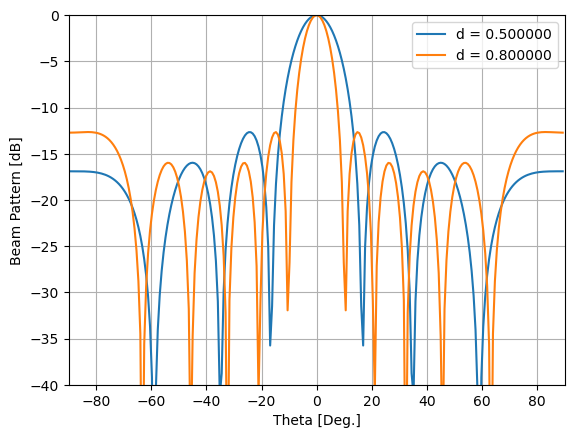

In [ ]:
angle_bins_deg = np.rad2deg(angle_bins)
angle_bins_grating_deg = np.rad2deg(angle_bins_grating)

fig, ax = plt.subplots()
ax.set_ylabel('Beam Pattern [dB]')
ax.set_xlabel('Theta [Deg.]')
ax.set_xlim([-90, 90])
ax.set_ylim([-40, 0])
ax.plot(angle_bins_deg, p, label='d = {:f}'.format(d))
ax.plot(angle_bins_grating_deg, p_grating, label='d = {:f}'.format(d_grating))
ax.grid()
ax.legend()

Increasing the spacing between elements (while keeping the number of elements constant) causes the main lobe of the beam pattern to become narrower.

This means that the array becomes more directional and can resolve signals arriving from closely spaced directions more effectively.
However this also leads to some side effects called *grating lobe*.
The grating lobe is an unwanted region in the beam pattern, where the array exhibits high sensitivity to signals arriving from directions other than the main lobe.

By evaluating beam pattern $\theta_0 = 35$, grating lobe can be observed. 


In [ ]:
theta_0_deg = 35
theta_0 = np.deg2rad(theta_0_deg)
p, angle_bins = ula_normal.get_beam_pattern(theta_0)
p_grating, angle_bins_grating = ula_grating.get_beam_pattern(theta_0)

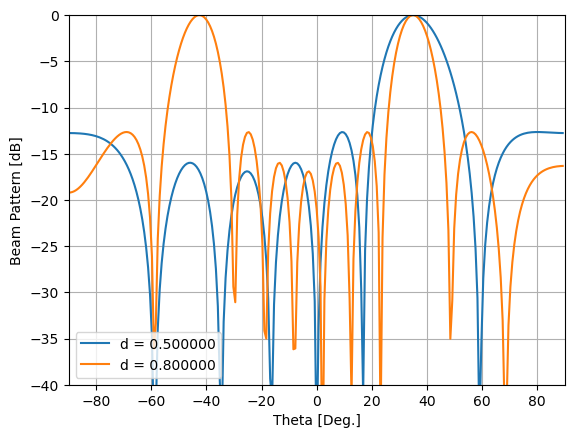

In [ ]:
angle_bins_deg = np.rad2deg(angle_bins)
angle_bins_grating_deg = np.rad2deg(angle_bins_grating)

fig, ax = plt.subplots()
ax.set_ylabel('Beam Pattern [dB]')
ax.set_xlabel('Theta [Deg.]')
ax.set_xlim([-90, 90])
ax.set_ylim([-40, 0])
ax.plot(angle_bins_deg, p, label='d = {:f}'.format(d))
ax.plot(angle_bins_grating_deg, p_grating, label='d = {:f}'.format(d_grating))
ax.grid()
ax.legend()

In the beam pattern of $d=0.8$, grating lobe appears at $\theta = 40^\circ$.
Notice that when the main lobe is steered away from boresight it becomes wider.
This occurs because the effective aperture of the array decreases as the steering angle increases,
leading to reduced angular resolution in the steered direction.

On the other hand, decreasing the spacing between array elements (while keeping the number of elements constant),
the main lobe becomes wider and the angular resolution decreases.

In [ ]:
ds = np.arange(1, 6) / 10
ps = []
for dd in ds:
    u = ULA(nr, dd)
    p, angle_bins = u.get_beam_pattern()
    ps.append(p)

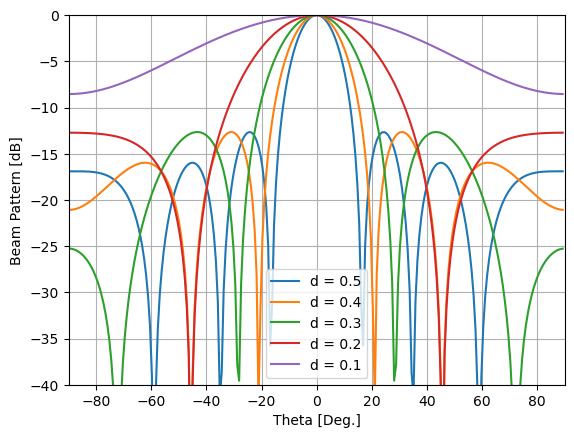

In [ ]:
angle_bins_deg = np.rad2deg(angle_bins)

fig, ax = plt.subplots()
ax.set_ylabel('Beam Pattern [dB]')
ax.set_xlabel('Theta [Deg.]')
ax.set_xlim([-90, 90])
ax.set_ylim([-40, 0])
for k in range(len(ds)):
    ax.plot(angle_bins_deg, ps[-(k+1)], label='d = {:1.1f}'.format(ds[-(k+1)]))
ax.grid()
ax.legend()

In order to summarize the relationship between the element spacing, the main lobe, and grating lobes, $d$ is continuously varied from $d=0.01$ to $d=2$.

In [ ]:
ds = np.arange(0.01, 2, 0.01)
ps = []
for dd in ds:
    u = ULA(nr, dd)
    p, angle_bins = u.get_beam_pattern()
    ps.append(p)

(0.0, 2.0)

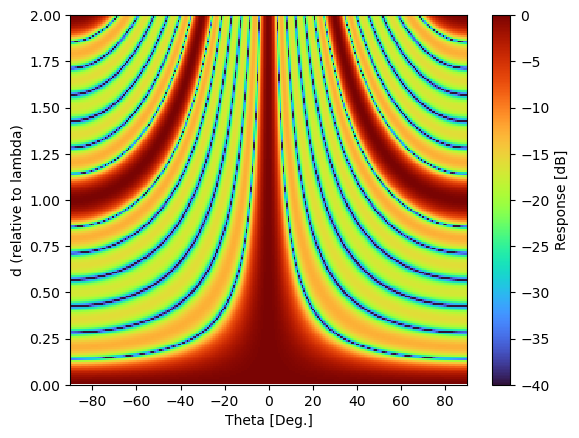

In [ ]:
angle_bins_deg = np.rad2deg(angle_bins)

min_dB = -40
pds = np.array(ps)
fig, ax = plt.subplots()
cm = ax.pcolor(angle_bins_deg, ds, pds, cmap='turbo', vmin=min_dB)
fig.colorbar(cm, ax=ax, label='Response [dB]')
ax.set_ylabel('d (relative to lambda)')
ax.set_xlabel('Theta [Deg.]')
ax.set_xlim([-90, 90])
ax.set_ylim([0, 2])

As $d$ increases, it is observed that the main lobe becomes narrower and the angular resolution improves.
However, it is also seen that grating lobes start to appear when $d > 0.5$.

Next, the effects of window functions and *tapering* are reviewed.
By applying different window functions (tapering) to the array elements, it is possible to observe how the beam pattern changes, such as the reduction of side lobes and the broadening of the main lobe. The window functions considered here include rectangular, Hamming, Hann, and Blackman windows.
The implementation uses the window functions provided by `NumPy`.
The shapes of each window function are as follows.

In [ ]:
theta_0 = 0
nr = 32
d = 0.5
ula_normal = ULA(nr, d)

In [ ]:
coef = ula_normal.get_steering_vector(theta_0)
p_fft, angle_bins_fft = ula_normal.get_beam_pattern_fft(coef)

t = np.arange(0, nr)
rectangular_window = np.ones(nr)
hanning_window = np.hanning(nr)
coef_hanning = coef * hanning_window
p_hanning_fft, angle_bins_fft = ula_normal.get_beam_pattern_fft(coef_hanning)
hamming_window = np.hamming(nr)
coef_hamming = coef * hamming_window
p_hamming_fft, angle_bins_fft = ula_normal.get_beam_pattern_fft(coef_hamming)
blackman_window = np.blackman(nr)
coef_blackman = coef * blackman_window
p_blackman_fft, angle_bins_fft = ula_normal.get_beam_pattern_fft(coef_blackman)

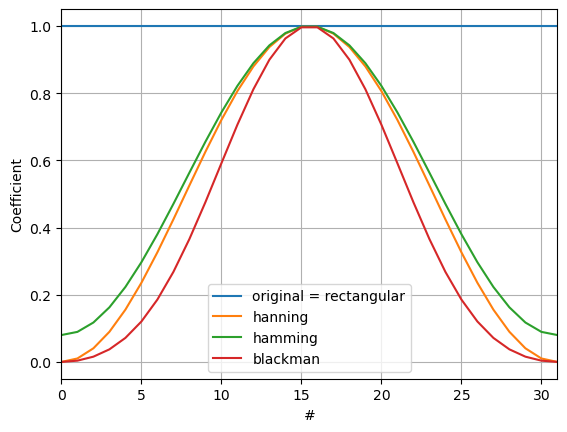

In [ ]:
fig, ax = plt.subplots()
ax.set_ylabel('Coefficient')
ax.set_xlabel('#')
ax.set_xlim([0, nr - 1])
ax.plot(t, rectangular_window, label='original = rectangular')
ax.plot(t, hanning_window, label='hanning')
ax.plot(t, hamming_window, label='hamming')
ax.plot(t, blackman_window, label='blackman')
ax.grid()
ax.legend()

Each window function is applied to the array elements, and the resulting beam pattern is observed.
This allows for a intuitive comparison of how different window shapes affect the main lobe width and side lobe levels in the beam pattern.

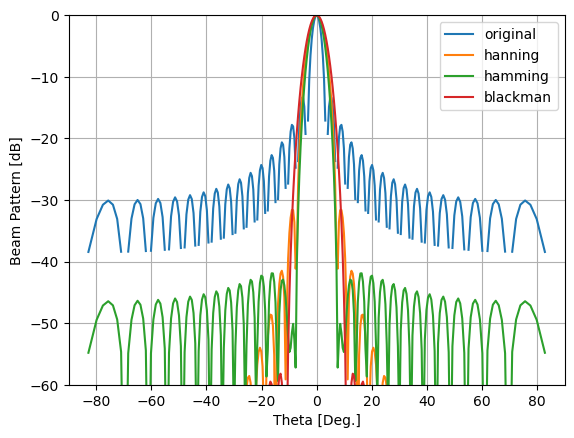

In [ ]:
angle_bins_fft_deg = np.rad2deg(angle_bins_fft)

fig, ax = plt.subplots()
ax.set_ylabel('Beam Pattern [dB]')
ax.set_xlabel('Theta [Deg.]')
ax.set_xlim([-90, 90])
ax.set_ylim([-60, 0])
ax.plot(angle_bins_fft_deg, p_fft, label='original')
ax.plot(angle_bins_fft_deg, p_hanning_fft, label='hanning')
ax.plot(angle_bins_fft_deg, p_hamming_fft, label='hamming')
ax.plot(angle_bins_fft_deg, p_blackman_fft, label='blackman')
ax.grid()
ax.legend()

When comparing these window functions in terms of main lobe width, sidelobe level, and dynamic range, differences can be seen.
The rectangular window offers the narrowest main lobe and highest angular resolution, but it also produces high sidelobe levels and the lowest dynamic range.
The Hamming window widens the main lobe compared to the rectangular window, but it significantly reduces the sidelobe levels.
A distinctive feature of the Hamming window is that its first sidelobe is much weaker than the subsequent sidelobes, which helps to further suppress interference from directions close to the main beam. The Hann and Blackman windows continue this trend, with even lower sidelobe levels and broader main lobes, and the Blackman window provides the highest dynamic range and sidelobe suppression.
Overall, the choice of window function involves a trade-off between main lobe width, sidelobe suppression, and the position and strength of the sidelobes.

Finally, we review creating a non-uniform array by using a window function that contains zero-valued elements.
In this approach, elements corresponding to zeros in the window function are omitted, resulting in an array with non-uniform spacing.
It is possible to investigate how the absence of certain elements and the resulting non-uniform spacing affect the beam pattern.
The arrays considered here  includes ULAs  with 4 and 7 elements, as well as a 4-element minimum redundant array. By comparing the beam patterns of these different array configurations, it is possible to observe the effects of array geometry and element placement on main lobe width, sidelobe levels.

In [ ]:
theta_0 = 0
nr = 7
d = 0.5
ula_normal = ULA(nr, d)
ula_normal2 = ULA(4, d)

# 7-ULA
coef = ula_normal.get_steering_vector(theta_0)
p_fft, angle_bins_fft = ula_normal.get_beam_pattern_fft(coef)
mra_weight = np.array([1, 1, 0, 0, 1, 0, 1])
coef_mra = coef * mra_weight
p_fft_mra, angle_bins_fft = ula_normal.get_beam_pattern_fft(coef_mra)
# 4-ULA
coef2 = ula_normal2.get_steering_vector(theta_0)
p_fft2, angle_bins_fft2 = ula_normal2.get_beam_pattern_fft(coef2)

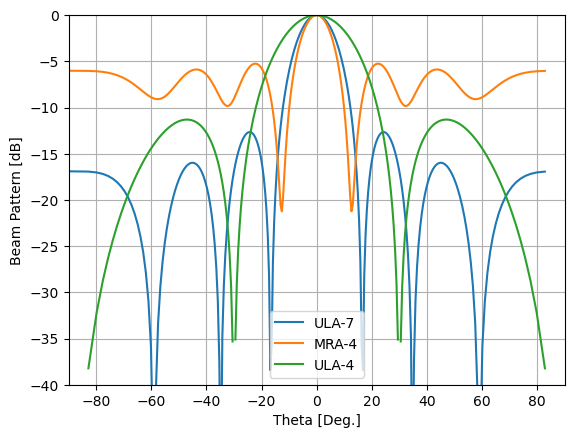

In [ ]:
angle_bins_fft_deg = np.rad2deg(angle_bins_fft)
angle_bins_fft2_deg = np.rad2deg(angle_bins_fft2)

fig, ax = plt.subplots()
ax.set_ylabel('Beam Pattern [dB]')
ax.set_xlabel('Theta [Deg.]')
ax.set_xlim([-90, 90])
ax.set_ylim([-40, 0])
ax.plot(angle_bins_fft_deg, p_fft, label='ULA-7')
ax.plot(angle_bins_fft_deg, p_fft_mra, label='MRA-4')
ax.plot(angle_bins_fft2_deg, p_fft2, label='ULA-4')
ax.grid()
ax.legend()

Among these arrays, the main lobe of the 4-element minimum redundant array (MRA-4) is the narrowest.
In comparison, the 7-element ULA (ULA-7) and the 4-element ULA (ULA-4) both exhibit wider main lobes.
However, compared to ULA-4, MRA-4 has shallower nulls and higher sidelobe levels.
While the MRA-4 achieves higher angular resolution, this comes at the expense of reduced null depth and increased sidelobe levels.

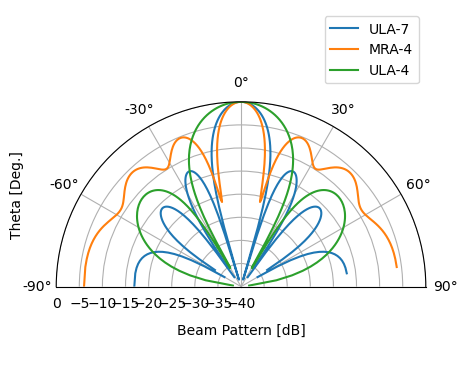

In [ ]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.set_thetalim([-np.pi/2, np.pi/2])
ax.set_rlim([-40, 0])
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_xlabel('Beam Pattern [dB]', labelpad=-40)
ax.set_ylabel('Theta [Deg.]', labelpad=20)
ax.plot(angle_bins_fft, p_fft, label='ULA-7')
ax.plot(angle_bins_fft, p_fft_mra, '-', label='MRA-4')
ax.plot(angle_bins_fft2, p_fft2, label='ULA-4')
ax.legend()

As a result, the MRA may be more susceptible to interference from unwanted directions compared to an ULA with the same number of elements.
Asssume two signals are incident on the MRA-4 from $\theta_0 = 0^\circ$ and $\theta_1 =18^\circ$.
it can be observed that the angle at which the array higher gain changes, compared to when each signal is incident separately.
This indicates that the presence of multiple signals causes the main lobe and sidelobe to interact, leading to a shift in the direction of the highest array response.
This indicates the influence of sidelobe level on the ability to resolve and separate multiple signals.

In [ ]:
theta_0_deg = 18
theta_0 = np.deg2rad(theta_0_deg)

# 4-MRA 18 degrees
coef_18 = ula_normal.get_steering_vector(theta_0)
coef_mra_18 = coef_18 * mra_weight
p_fft_mra_18, _ = ula_normal.get_beam_pattern_fft(coef_mra_18)

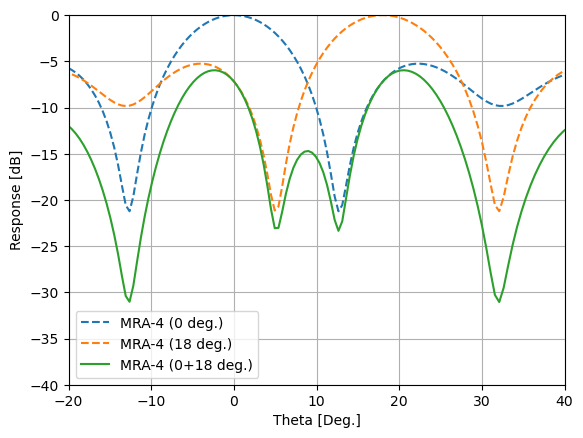

In [ ]:
fig, ax = plt.subplots()
ax.set_ylabel('Response [dB]')
ax.set_xlabel('Theta [Deg.]')
ax.set_xlim([-20, 40])
ax.set_ylim([-40, 0])
ax.plot(angle_bins_fft_deg, p_fft_mra, '--', label='MRA-4 (0 deg.)')
ax.plot(angle_bins_fft_deg, p_fft_mra_18, '--', label='MRA-4 (18 deg.)')
ax.plot(angle_bins_fft_deg, p_fft_mra + p_fft_mra_18, label='MRA-4 (0+18 deg.)')
ax.grid()
ax.legend()

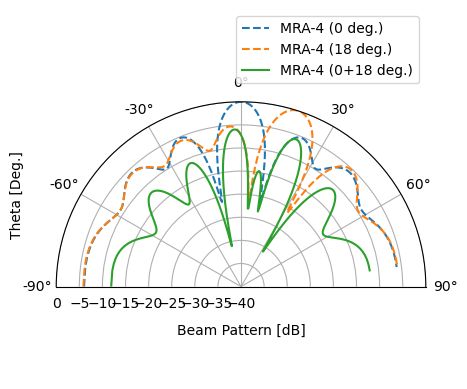

In [ ]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.set_thetalim([-np.pi/2, np.pi/2])
ax.set_rlim([-40, 0])
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_xlabel('Beam Pattern [dB]', labelpad=-40)
ax.set_ylabel('Theta [Deg.]', labelpad=20)
ax.plot(angle_bins_fft, p_fft_mra, '--', label='MRA-4 (0 deg.)')
ax.plot(angle_bins_fft, p_fft_mra_18, '--', label='MRA-4 (18 deg.)')
ax.plot(angle_bins_fft, p_fft_mra + p_fft_mra_18, label='MRA-4 (0+18 deg.)')
ax.legend()